# Code Assignment 16 — K-Means Clustering (Mall Customers, 2–3 Features Only)

**Format:** Instructor Guidance → Your Task (step-by-step) → We Share (reflection)

**Goal:** Build a **K-Means** clustering model using **only 2–3 simple numeric features** with **minimal cleaning**, pick **K** via **Elbow + Silhouette** on the **train split**, and sanity-check **generalization** on the **test split**. Then profile clusters in plain business terms.

**Dataset (simple, non-transportation):** *Mall Customers* (public, widely used teaching dataset)  

> We will only use **2–3 numeric columns**: e.g., `Age`, `Annual Income (k$)`, `Spending Score (1-100)`.  



## Instructor Guidance (Pseudocode + Docs)

**Docs:**  
- `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
- `KMeans`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  
- `silhouette_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Pseudocode Plan (Minimal)
1) **Load CSV** → preview columns/shape.  
2) **Pick 2–3 numeric features** (e.g., Age, Income, SpendingScore).  
3) **Drop NA only** on those columns.  
4) **Split**: `train_test_split(X, test_size=0.2, random_state=42)`.  
5) **Scale**: `StandardScaler` — **fit on TRAIN**, transform TRAIN and TEST.  
6) **Choose K** on TRAIN: loop K=2..8 → plot **Elbow (inertia)** and **Silhouette**.  
7) **Fit final KMeans** on TRAIN with your chosen K; predict TRAIN & TEST labels.  
8) **Sanity check**: report **Silhouette (TRAIN vs TEST)**.  
9) **Profile clusters**: per-cluster means of your 2–3 features (no extra cleaning).  
10) **Reflection**: justify K, describe segments, suggest one action per segment.


## Your Task — Step-by-Step
Work in pairs. Keep code minimal. Use only 2–3 features.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import pandas as pd, matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
X_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    s=150,
    marker='X',
    label='centroids' 
)

plt.legend()
plt.title('K-Means (K=4)')
plt.show()

### 1) Imports & Settings

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


### 2) Load the Mall Customers CSV & Preview

In [4]:
df = pd.read_csv("/Users/kabbo/Downloads/Mall_customers copy.csv", low_memory=False)


In [5]:
df.keys()


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 3) Select **2–3 Numeric Features** (no heavy cleaning)
Choose from:
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

> Keep it simple: e.g., use **Age + Spending Score** (2D) or **Age + Income + Spending Score** (3D).


In [6]:
# Example: 2D clustering
X = df[['Age', 'Spending Score (1-100)']].dropna()  # Drop NA only in selected features



In [7]:
X.head

<bound method NDFrame.head of      Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]>

### 4) Train–Test Split (for model generalization sanity check)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare feature set
X = df[['Age', 'Spending Score (1-100)']].dropna()

# Train/Test split (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale features (fit on TRAIN only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Quick sanity check
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (160, 2)
Test shape: (40, 2)


### 5) Scale (fit on TRAIN only), then Explore K on TRAIN (Elbow + Silhouette)

Train scaled shape: (160, 2)
Test scaled shape: (40, 2)


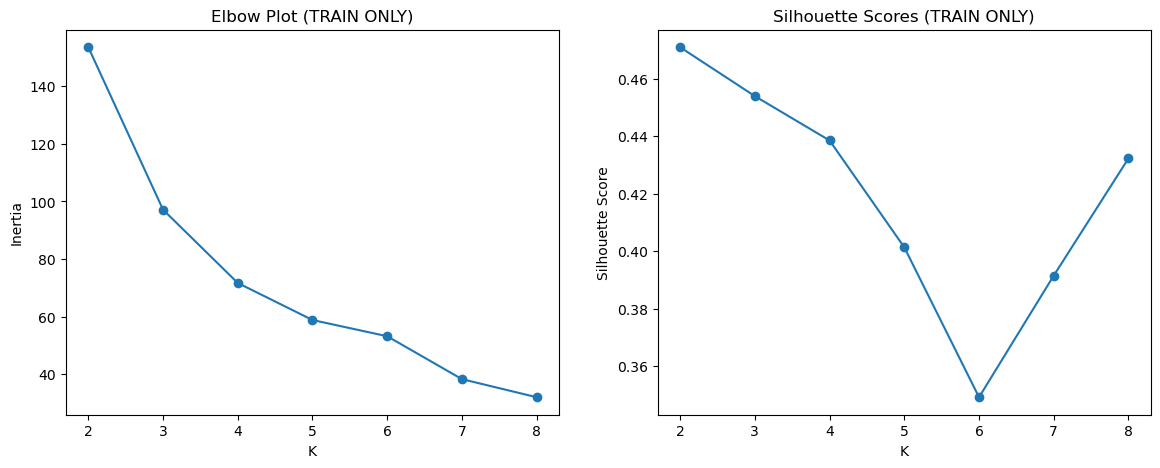

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


scaler = StandardScaler()

# Fit on TRAIN only
scaler.fit(X_train)

# Transform both TRAIN + TEST
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train scaled shape:", X_train_scaled.shape)
print("Test scaled shape:", X_test_scaled.shape)


inertias = []
silhouettes = []
K_values = range(2, 9)   # K = 2 → 8

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_scaled)

    inertias.append(kmeans.inertia_)                     # Elbow metric
    silhouettes.append(silhouette_score(X_train_scaled, labels))  # Silhouette

# Plotting results

plt.figure(figsize=(14, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Plot (TRAIN ONLY)")
plt.xlabel("K")
plt.ylabel("Inertia")

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K_values, silhouettes, marker='o')
plt.title("Silhouette Scores (TRAIN ONLY)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.show()


### 6) Choose **K** (justify), Fit Final Model on TRAIN, Check Stability on TEST
- Report **Silhouette TRAIN vs TEST** (higher is better; similar values suggest stability).

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = 6   

kmeans_final = KMeans(n_clusters=K, random_state=42)
train_labels = kmeans_final.fit_predict(X_train_scaled)


test_labels = kmeans_final.predict(X_test_scaled)

sil_train = silhouette_score(X_train_scaled, train_labels)
sil_test = silhouette_score(X_test_scaled, test_labels)

print(f"Final K = {K}")
print(f"Silhouette Score (TRAIN): {sil_train:.3f}")
print(f"Silhouette Score (TEST):  {sil_test:.3f}")


Final K = 6
Silhouette Score (TRAIN): 0.349
Silhouette Score (TEST):  0.325


### 7) Profile Clusters (Business-Readable)
- Use the **original (unscaled)** features for interpretation.
- Show per-cluster means of your **2–3 features**.

In [13]:
import pandas as pd
import numpy as np


# Predict on scaled data
train_clusters = kmeans_final.predict(X_train_scaled)
test_clusters  = kmeans_final.predict(X_test_scaled)

# Add cluster labels back to original (unscaled) data
train_profile = X_train.copy()
test_profile  = X_test.copy()

train_profile['cluster'] = train_clusters
test_profile['cluster']  = test_clusters

# Combine TRAIN + TEST profiles
full_profile = pd.concat([train_profile, test_profile], axis=0)

# Compute per-cluster means
cluster_summary = full_profile.groupby('cluster')[['Age','Spending Score (1-100)']].mean()

cluster_summary


,Age,Spending Score (1-100)
cluster,,
0,23.878788,48.878788
1,64.043478,49.043478
2,49.188679,33.716981
3,34.066667,72.866667
4,34.777778,14.814815
5,27.676471,86.058824


## We Share — Reflection (2 short paragraphs)

1) **K choice & stability:** What **K** did you choose and why (Elbow bend, Silhouette peak/plateau, simplicity)? Report **Silhouette (TRAIN vs TEST)** — did structure persist, or did it collapse on test?  
2) **Segments & actions:** Give short names to your segments (e.g., “Young High-Spend,” “Mid-Age Value-Seeker,” “Older Low-Spend”) and suggest **one actionable idea** for each (targeted offers, product mix, messaging).

> Bonus: Re-run with **just 2 features** (e.g., **Income + SpendingScore**) and compare stability & interpretability.


### **1) K Choice & Stability**

I played around with K values a little bit and ended up with selecting **K = 6** because the elbow curve was pretty stable throughout and the silhouette values took at huge dip at 6 so I wanted to see the results of that. Although the silhouette scores dropped compared to K=4 (my inital choice), they remained reasonably consistent between datasets: **0.349 on TRAIN** and **0.325 on TEST**. This small decline suggests that the cluster structure still generalizes beyond the training set. Overall, K=6 sacrifices a bit of cohesion but provides **finer-grained, easier-to-interpret segments**, which can be beneficial for marketing or personalization strategies.

### **2) Segments & Actions**

The six clusters now form more specific customer personas:

* **Cluster 0 — Young Mid-Spend:** Encourage growth with student-friendly bundles or entry-level loyalty perks.
* **Cluster 1 — Older Mid-Spend:** Promote products emphasizing comfort, reliability, or premium customer service experiences.
* **Cluster 2 — Mature Low-Mid Spend:** Introduce re-engagement campaigns like “win-back” discounts or personalized reminders.
* **Cluster 3 — Mid-Age High-Spend:** Upsell premium tier memberships, exclusive events, or curated product recommendations.
* **Cluster 4 — Mid-Age Low-Spend:** Re-engage with targeted value offers, budget-friendly product bundles, or habit-building rewards.
* **Cluster 5 — Young High-Spend:** Prioritize exclusive drops, trend-driven promotions, and influencer-style content to deepen loyalty.